In [1]:
from UTime.CostFunctions import DiceLoss
import torch

f = DiceLoss()

outputs = torch.Tensor([[0.2,0.1,0.7],[0.4,0.1,0.1]])
labels = torch.Tensor([[0,0,1],[1,0,0]])
f(torch.flatten(outputs), torch.flatten(labels))

tensor(-0.3340)

In [6]:
import torch
test = torch.tensor([[[0.2,0.1,0.7],[0.4,0.1,0.1]],
                     [[0.4,0.2,0.9],[0.5,0.1,0.8]]])
test.shape

torch.Size([2, 2, 3])

In [14]:
import numpy as np
test = torch.tensor([[0.2,0.1,0.7],[0.4,0.1,0.1]])
torch.tensor(np.array([test for i in range(5)]))

tensor([[[0.2000, 0.1000, 0.7000],
         [0.4000, 0.1000, 0.1000]],

        [[0.2000, 0.1000, 0.7000],
         [0.4000, 0.1000, 0.1000]],

        [[0.2000, 0.1000, 0.7000],
         [0.4000, 0.1000, 0.1000]],

        [[0.2000, 0.1000, 0.7000],
         [0.4000, 0.1000, 0.1000]],

        [[0.2000, 0.1000, 0.7000],
         [0.4000, 0.1000, 0.1000]]])

In [7]:
test

tensor([[[0.2000, 0.1000, 0.7000],
         [0.4000, 0.1000, 0.1000]],

        [[0.4000, 0.2000, 0.9000],
         [0.5000, 0.1000, 0.8000]]])

In [10]:
test.transpose(0,1).reshape((1,2,6))

tensor([[[0.2000, 0.1000, 0.7000, 0.4000, 0.2000, 0.9000],
         [0.4000, 0.1000, 0.1000, 0.5000, 0.1000, 0.8000]]])

In [8]:
test.transpose(1,2)

tensor([[[0.2000, 0.4000],
         [0.1000, 0.1000],
         [0.7000, 0.1000]],

        [[0.4000, 0.5000],
         [0.2000, 0.1000],
         [0.9000, 0.8000]]])

In [9]:
test.reshape((1,2,6))

tensor([[[0.2000, 0.1000, 0.7000, 0.4000, 0.1000, 0.1000],
         [0.4000, 0.2000, 0.9000, 0.5000, 0.1000, 0.8000]]])

In [4]:
test

tensor([[[0.2000, 0.1000, 0.7000],
         [0.4000, 0.1000, 0.1000]]])

In [6]:
test2 = 2*test
test2

tensor([[[0.4000, 0.2000, 1.4000],
         [0.8000, 0.2000, 0.2000]]])

In [9]:
torch.concat((test,test2),dim=1).shape

torch.Size([1, 4, 3])

In [12]:
torch.concat((test,test2),dim=0)

torch.Size([2, 2, 3])

In [5]:
test.repeat(1,1,3)

tensor([[[0.2000, 0.1000, 0.7000, 0.2000, 0.1000, 0.7000, 0.2000, 0.1000,
          0.7000],
         [0.4000, 0.1000, 0.1000, 0.4000, 0.1000, 0.1000, 0.4000, 0.1000,
          0.1000]]])

In [13]:
import pandas as pd
import numpy as np
from UTime import WindowsEntangledMomentsSpectro

all_data = pd.read_pickle('data_reduced_for_pycharm.pkl')
pos = pd.read_pickle('pos_reduced_for_pycharm.pkl')
omni = pd.read_pickle('omni_reduced_for_pycharm.pkl')

from UTime import Windows
spectro_features = [f'spectro_{i}' for i in range(32)]
moments_features = ['Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'OMNI_Bx','OMNI_By','OMNI_Bz']
win_duration = np.timedelta64(30, 'm')

windows = WindowsEntangledMomentsSpectro(all_data, pos, omni, win_duration, spectro_features=spectro_features, moments_features = moments_features, is_prepared=True)

ValueError: Found array with 0 sample(s) (shape=(0, 41)) while a minimum of 1 is required by StandardScaler.

In [5]:
omni = omni.rename(columns={col:"OMNI_"+col for col in omni.columns})
omni = omni.ffill().bfill()

dataset = pd.concat([all_data, omni], axis = 1)

In [10]:
def select_windows(df, condition):
    """ Needs to have one for all the points of the window, not only for the last one!
    Refactor flag function, and the counts of swapp."""

    if isinstance(condition, str):
        if condition == ('all'):
            return df
        else:
            return df[df[condition].values == True]
    elif isinstance(condition, list):
        if condition != []:
            subdf = select_windows(df, condition[0])
            return select_windows(subdf, condition[1:])
        else:
            return df
    else:
        raise Exception("Condition should be a string or a list of strings.")

np.unique(select_windows(dataset, ['isFull_select']).isDayside_select.values, return_counts=True)

(array([False]), array([2154]))

In [9]:
select_windows(dataset, ['isDayside_select'])


,Bx,By,Bz,Np,Vx,Vy,Vz,Tp,spectro_0,spectro_1,...,OMNI_Vy,OMNI_Vz,OMNI_Tp,OMNI_Pd,OMNI_Beta,OMNI_Ma,OMNI_B,OMNI_V,OMNI_COA,OMNI_CLA
2015-09-21 21:44:40,-1.94710,45.149450,33.88825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-28.036837,-0.392665,70990.0,2.16,1.84,11.5,4.492004,488.106042,-0.610723,0.458439
2015-09-21 21:44:45,-1.94710,45.072550,33.88825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-28.036837,-0.392665,70990.0,2.16,1.84,11.5,4.492004,488.106042,-0.610723,0.458439
2015-09-21 21:44:50,-2.09040,45.063125,33.89925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-28.036837,-0.392665,70990.0,2.16,1.84,11.5,4.492004,488.106042,-0.610723,0.458439
2015-09-21 21:44:55,-2.29380,45.063125,33.89925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-28.036837,-0.392665,70990.0,2.16,1.84,11.5,4.492004,488.106042,-0.610723,0.458439
2015-09-21 21:45:00,-2.46705,45.145350,33.84700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-28.036837,-0.392665,70990.0,2.16,1.84,11.5,4.492004,488.106042,-0.610723,0.458439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-24 02:59:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.543120,2.635167,62508.0,2.21,0.75,6.8,7.737984,441.790470,1.054493,1.894427
2015-09-24 02:59:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.543120,2.635167,62508.0,2.21,0.75,6.8,7.737984,441.790470,1.054493,1.894427
2015-09-24 02:59:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.543120,2.635167,62508.0,2.21,0.75,6.8,7.737984,441.790470,1.054493,1.894427
2015-09-24 02:59:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.543120,2.635167,62508.0,2.21,0.75,6.8,7.737984,441.790470,1.054493,1.894427


In [5]:
from UTime.architecture import Architecture
    
Architecture(1,
        30,
                 10,
                 32,
                 5,
                 16,
                 5,
                 2, plot_ROC=True)

Architecture()

In [1]:
from UTime.UTime import UTime
    
UTime(1,
        30,
                 10,
                 32,
                 5,
                 16,
                 5,
                 2, plot_ROC=True)

UTime(
  (encoder): Sequential(
    (0): Sequential(
      (0): Dropout(p=0, inplace=False)
      (1): Conv2d(10, 16, kernel_size=(1, 5), stride=(1, 1), padding=same)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Dropout(p=0, inplace=False)
      (1): Conv2d(16, 32, kernel_size=(1, 5), stride=(1, 1), padding=same)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (0): Dropout(p=0, inplace=False)
      (1): Conv2d(32, 64, kernel_size=(1, 5), stride=(1, 1), padding=same)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [1]:
(-1)//2

-1

In [1]:
import torch
from UTime.architectureResNet import UTime
import numpy as np

utime = UTime(1, 300, 8, 32, 2, 5, 3, 2).double()
moments = torch.tensor(np.random.rand(1,8,1,300)).double()
spectro = torch.tensor(np.random.rand(1,1,32,300)).double()
utime.forward((moments,spectro))

tensor([[[[0.7718, 0.6049, 0.4929, 0.3447, 0.4552, 0.7978, 0.6785, 0.7578,
           0.7357, 0.7228, 0.8889, 0.4564, 0.3131, 0.1722, 0.1575, 0.7353,
           0.8374, 0.4741, 0.7447, 0.7362, 0.6134, 0.4891, 0.3927, 0.3684,
           0.3132, 0.2019, 0.1360, 0.3547, 0.4785, 0.1334, 0.5671, 0.5563,
           0.4939, 0.3703, 0.3694, 0.6733, 0.2613, 0.2328, 0.7059, 0.7920,
           0.4671, 0.5951, 0.1805, 0.9034, 0.4755, 0.1978, 0.2298, 0.2665,
           0.8161, 0.9028, 0.4355, 0.7428, 0.3838, 0.3765, 0.1903, 0.4212,
           0.2838, 0.6184, 0.5107, 0.7803, 0.8684, 0.8348, 0.4777, 0.2774,
           0.5514, 0.5672, 0.7079, 0.6258, 0.2006, 0.1642, 0.4701, 0.9202,
           0.4467, 0.4731, 0.4368, 0.4238, 0.3645, 0.5417, 0.6162, 0.5954,
           0.2146, 0.2033, 0.6076, 0.2130, 0.7925, 0.4750, 0.6077, 0.3575,
           0.7505, 0.6066, 0.4169, 0.4494, 0.5001, 0.7058, 0.1407, 0.2887,
           0.3472, 0.9321, 0.2654, 0.6238, 0.4424, 0.2636, 0.4920, 0.3870,
           0.1413, 0.7155

In [ ]:
training = Training(model, 2000, dl_train, dltest = dl_test, dlval=dl_test, validation=True,     # To make it more general, get those parameters from kwargs?
                                       learning_rate=0.001, verbose_plot = True if iter==0 else False, mirrored = True)

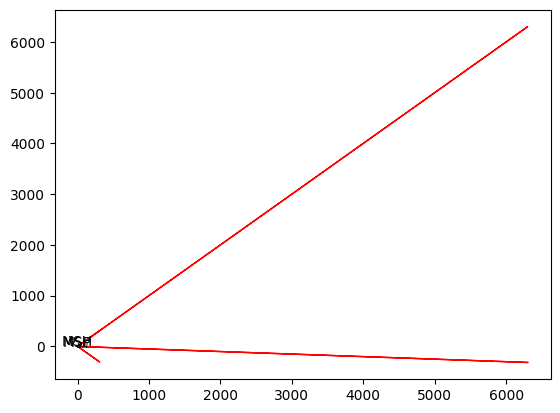

In [48]:
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib
#matplotlib.rcParams["text.usetex"] = False
mu_0 = 1.25663706 * 10**(-6)

def draw_HT(V_sh=10**(-2), B_MSP=10, B_MSH=1, rho_MSP=1, rho_MSH=4):
    dx = 3
    dy = 3
    plt.figure()
    plt.plot(np.linspace(-dx, dx, 100), np.zeros(100), linestyle = '--', alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), -np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), -np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    
    # Direction of B 
    plt.arrow(0.9*dx, -0.9*dy, -dx/100, dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(-0.85*dx, -0.85*dy, -dx/100, -dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(0.85*dx, 0.85*dy, dx/100, dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(-0.9*dx, 0.9*dy, dx/100, -dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
     
    # V_SH
    plt.arrow(-V_sh/2, dy, V_sh, 0, head_width=0.2, overhang = 0.5)
    plt.text(0, dy*0.9, '$V_{sh}$', horizontalalignment = 'center')
    
    # Alfven speed
    V_a_MSH = B_MSH/np.sqrt(mu_0*rho_MSH)
    V_a_MSHx = V_a_MSH*np.cos(np.arctan(dy/dx))
    V_a_MSHy = V_a_MSH*np.sin(np.arctan(dy/dx))

    V_a_MSP = B_MSP/np.sqrt(mu_0*rho_MSP)
    V_a_MSPx = V_a_MSP*np.cos(np.arctan(dy/dx))
    V_a_MSPy = V_a_MSP*np.sin(np.arctan(dy/dx))
    
    plt.arrow(dx, dy, V_a_MSHx, V_a_MSHy, head_width=0.2, overhang = 0.5, color = 'red')
    plt.arrow(-dx, dy, V_a_MSHx, -V_a_MSHy, head_width=0.2, overhang = 0.5, color = 'red')
    plt.arrow(dx, -dy, V_a_MSPx, -V_a_MSHy, head_width=0.2, overhang = 0.5, color = 'red')
    plt.arrow(-dx, -dy, V_a_MSPx, V_a_MSPy, head_width=0.2, overhang = 0.5, color = 'red')

    plt.text(0, -2*dy, 'MSP', ha = 'center')
    plt.text(0, 2*dy, 'MSH', ha = 'center')

    plt.show()
    
draw_HT()

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_field_lines(dx, alpha):
    dy = dx*np.tan(alpha)
    plt.plot(np.linspace(-dx, dx, 100), np.zeros(100), linestyle = '--', alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), np.linspace(0, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), np.linspace(0, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), -np.linspace(0, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), -np.linspace(0, dy, 100), alpha = 0.8, color = 'grey')

    _,_ = plot_centered_arrow(0.9, dx, alpha, dx/100, dy/100, 'upper right', head_width=0.05*dx, overhang = 0.5, color = 'grey')
    _,_ = plot_centered_arrow(0.9, dx, alpha, dx/100, -dy/100, 'upper left', head_width=0.05*dx, overhang = 0.5, color = 'grey')
    _,_ = plot_centered_arrow(0.9, dx, alpha, -dx/100, -dy/100, 'lower left', head_width=0.05*dx, overhang = 0.5, color = 'grey')
    _,_ = plot_centered_arrow(0.9, dx, alpha, -dx/100, dy/100, 'lower right', head_width=0.05*dx, overhang = 0.5, color = 'grey')

def plot_centered_arrow(close_to_center, dx_figure, alpha, dx_arrow, dy_arrow, loc, **kwargs):
    dy_figure = dx_figure*np.tan(alpha)
    center_distance_x = close_to_center*dx_figure
    center_distance_y = close_to_center*dy_figure
    
    if loc=='upper left':
        center_distance_x = -center_distance_x
    if loc=='lower right':
        center_distance_y = -center_distance_y
    if loc=='lower left':
        center_distance_x = -center_distance_x
        center_distance_y = -center_distance_y
        
    start_x = center_distance_x - dx_arrow/2
    start_y = center_distance_y - dy_arrow/2
        
    text = kwargs.pop('text','')
    #plt.text(center_distance_x, center_distance_y+0.1*dy, text, ha='center', color=kwargs.get('color','k'))
    plt.arrow(start_x, start_y, dx_arrow, dy_arrow, length_includes_head=True, label = text, **kwargs)
    return start_x, start_y

def alfven_speed(B, rho):
    return B/np.sqrt(mu_0*rho) 

def alfven_vector(Bx, By, rho):
    return alfven_speed(Bx, rho), alfven_speed(By, rho)

def plot_alfven_speed(V_ax, V_ay, loc, dx, alpha, **kwargs):
    if 'to_label' in kwargs:
        kwargs.pop('to_label')
        text = '$V_A$'
    else:
        text = ''
    start, stop = plot_centered_arrow(0.5, dx, alpha, V_ax, V_ay, loc, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, text = text, **kwargs)
    return start, stop

def flip_vector(vx, vy, start_x, start_y, dx, **kwargs):
    vx, vy = -vx, -vy    
    plt.arrow(start_x, start_y, vx, vy, head_width=0.05*dx, overhang = 0.5, width=0.05, zorder=10, color=kwargs.get('color','k'), linestyle=':', length_includes_head=True)
    return vx, vy

def v_ht_msh(v_ax, v_ay, v_sh, start_x, start_y, dx, **kwargs):
    plt.arrow(start_x - v_sh, start_y, v_sh, 0, head_width=0.05*dx, overhang = 0.5, width=0.05, zorder=10, color='k', linestyle=':', length_includes_head=True)
    if v_ay < 0:
        v_ax, v_ay = flip_vector(v_ax, v_ay, start_x, start_y, dx, color='red')   
    
    v_ht_y = v_ay
    v_ht_x = v_ax + v_sh
    if 'to_label' in kwargs:
        plt.arrow(start_x - v_sh, start_y, v_ht_x, v_ht_y, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, color='green', label = '$V_{HT}$', length_includes_head=True)
    else:
        plt.arrow(start_x - v_sh, start_y, v_ht_x, v_ht_y, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, color='green', length_includes_head=True)
    
    return v_ht_x, v_ht_y, start_x, start_y

def v_bl(v_ax, v_ay, v_HT_x, v_HT_y, start_x, start_y, dx, **kwargs):
    if v_ay > 0:
        v_ax, v_ay = flip_vector(v_ax, v_ay, start_x, start_y, dx, color='red')   

    plt.arrow(start_x + v_ax, start_y + v_ay, v_HT_x, v_HT_y, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, color='green', length_includes_head=True)
    
    v_bl_y = v_HT_y + v_ay
    v_bl_x = v_HT_x + v_ax
    if 'to_label' in kwargs:
        plt.arrow(start_x, start_y, v_bl_x, v_bl_y, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, color='purple', label='$V_{BL}$', length_includes_head=True)
    else:
        plt.arrow(start_x, start_y, v_bl_x, v_bl_y, head_width=0.05*dx, overhang = 0.5, width=0.1, zorder=10, color='purple', length_includes_head=True)
    
    return v_bl_x, v_bl_y, start_x, start_y

def draw_v_ht_msh(B, alpha, loc, rho, dx, **kwargs):
    Bx = B*np.cos(alpha)
    By = B*np.sin(alpha)
    if loc=='upper left' or loc=='lower right':
        By = -By
    
    V_ax, V_ay = alfven_vector(Bx, By, rho)
    start_x, start_y = plot_alfven_speed(V_ax, V_ay, loc, dx, alpha, color='r')
    
    v_HT_x, v_HT_y, start_x, start_y = v_ht_msh(V_ax, V_ay, V_sh, start_x, start_y, dx, **kwargs)
    
    return v_HT_x, v_HT_y

def draw_v_ht_msp(B, alpha, loc, rho, v_HT_x, v_HT_y, dx, **kwargs):
    Bx = B*np.cos(alpha)
    By = B*np.sin(alpha)
    if loc=='upper left' or loc=='lower right':
        By = -By
    
    V_ax, V_ay = alfven_vector(Bx, By, rho)
    start_x, start_y = plot_alfven_speed(V_ax, V_ay, loc, dx, alpha, color='r', **kwargs)
    
    v_bl_x, v_bl_y, start_x, start_y = v_bl(V_ax, V_ay, v_HT_x, v_HT_y, start_x, start_y, dx, **kwargs)
    
    return v_bl_x, v_bl_y

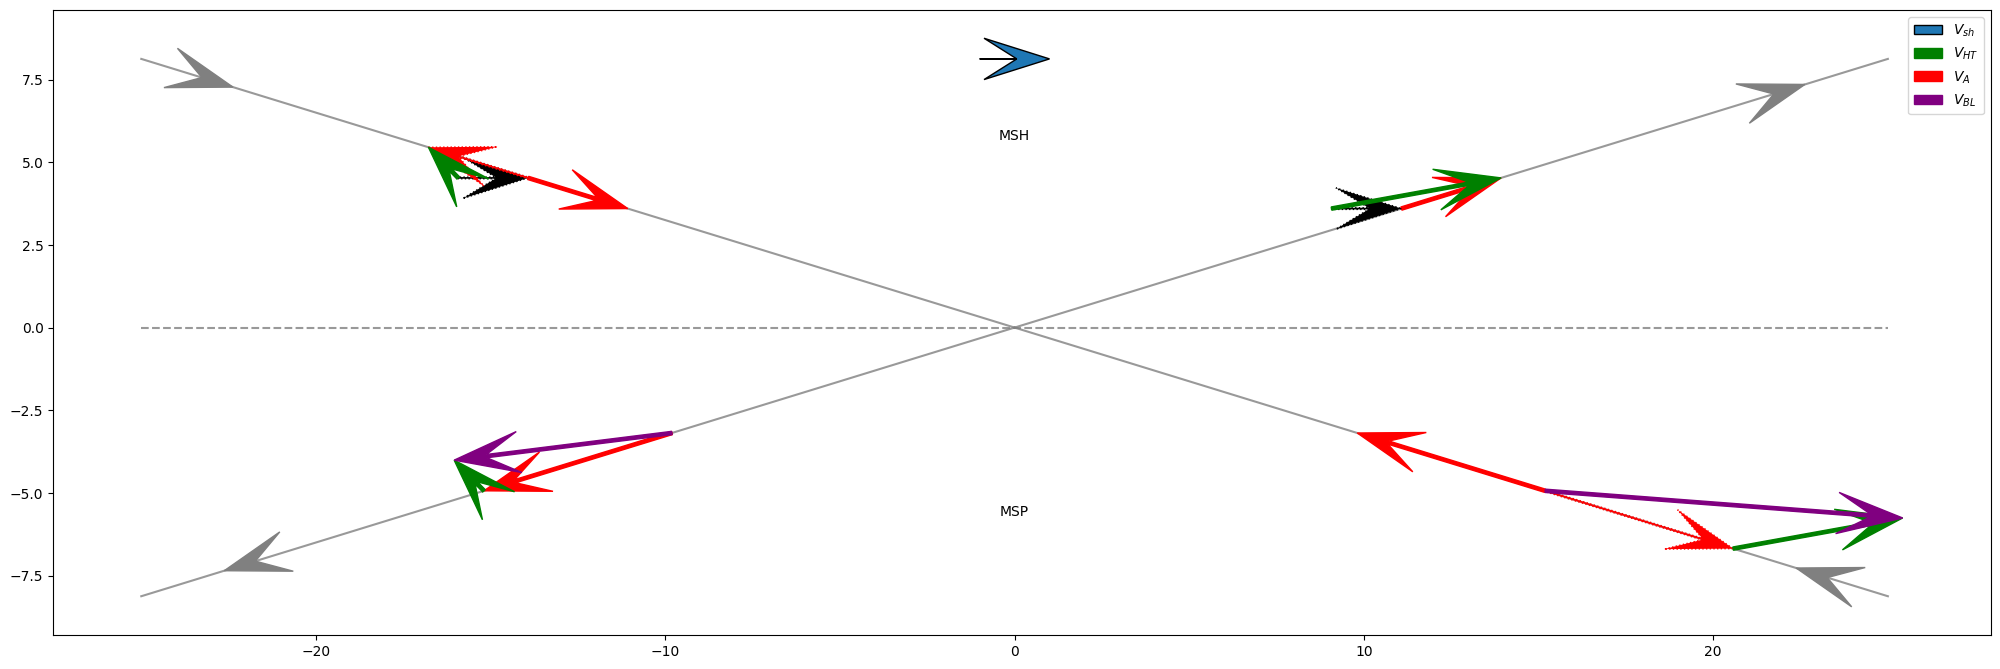

In [16]:
mu_0 = 1
V_sh=2
B_MSP=-8
B_MSH=6
rho_MSP=2
rho_MSH=4
alpha = np.pi/10

# B_MSP and B_MSH are positive values, it's only for the magnitudes, because in our configuration, B_MSH goes towards the right, and B_MSP towards the left

dx = 25
dy = np.tan(alpha)*dx
fig = plt.figure(figsize=(dx,dy))
plot_field_lines(dx, alpha)

# V_SH
plt.arrow(-V_sh/2, dy, V_sh, 0, head_width=0.05*dx, overhang = 0.5, label ='$V_{sh}$', length_includes_head=True)
#plt.text(0, dy*0.9, '$V_{sh}$', horizontalalignment = 'center')

# Alfven speed
v_HT_x, v_HT_y= draw_v_ht_msh(B_MSH, alpha, 'upper right', rho_MSH, dx, to_label=True)  
v_bl_x, v_bl_y = draw_v_ht_msp(B_MSP, alpha, 'lower right', rho_MSP, v_HT_x, v_HT_y, dx, to_label=True)

v_HT_x, v_HT_y = draw_v_ht_msh(B_MSH, alpha, 'upper left', rho_MSH, dx)
v_bl_x, v_bl_y = draw_v_ht_msp(B_MSP, alpha, 'lower left', rho_MSP, v_HT_x, v_HT_y, dx)

plt.text(0, -0.7*dy, 'MSP', ha = 'center')
plt.text(0, 0.7*dy, 'MSH', ha = 'center')

# V_HT
#v_HT_left = v_ht(V_ax_MSH, V_ay_MSH, V_sh)
#v_HT_left = v_ht(V_ax_MSH, V_ay_MSH, V_sh)

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib
#matplotlib.rcParams["text.usetex"] = False

def draw_HT(V_sh, B_MSP, B_MSH, rho_MSP, rho_MSH):
    # V_sh's module is in proportion of |V_a_MSH| and the sign gives its direction
    # |V_a_MSH| = 1 in the drawing
    
    dx = 3
    dy = 3
    plt.figure()
    plt.plot(np.linspace(-dx, dx, 100), np.zeros(100), linestyle = '--', alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, dx, 100), -np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    plt.plot(np.linspace(0, -dx, 100), -np.linspace(dy/20, dy, 100), alpha = 0.8, color = 'grey')
    
    # Direction of B 
    plt.arrow(0.9*dx, -0.9*dy, -dx/100, dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(-0.85*dx, -0.85*dy, -dx/100, -dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(0.85*dx, 0.85*dy, dx/100, dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
    plt.arrow(-0.9*dx, 0.9*dy, dx/100, -dy/100, color = 'grey', head_width=0.2, overhang = 0.5)
     
    # V_SH
    plt.arrow(-V_sh/2, dy, V_sh, 0, head_width=0.2, overhang = 0.5)
    plt.text(0, dy*0.9, '$V_{sh}$', horizontalalignment = 'center')
    
    # Alfven speed
    V_a_MSH = B_MSH/np.sqrt(mu_0*rho_MSH)
    V_a_MSP = B_MSP/np.sqrt(mu_0*rho_MSP)
    
    plt.show()
    
draw_HT(-2)